In [1]:
# imports
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
data_path = '/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis=1, inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


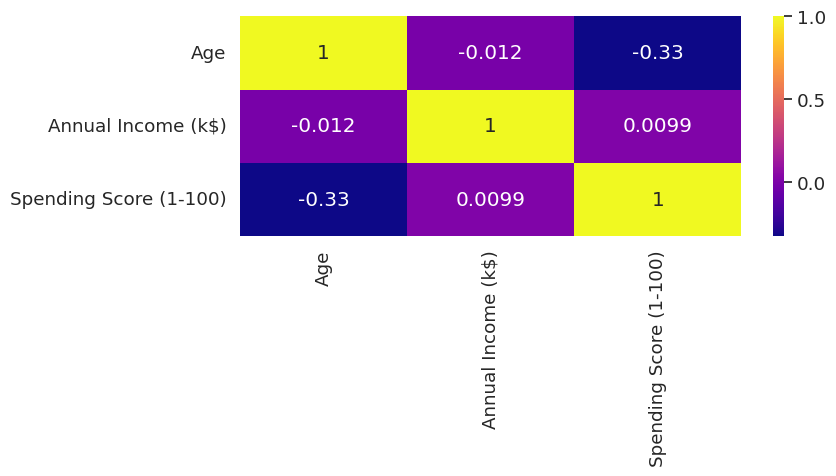

In [9]:
cor = df.corr()
sns.set(font_scale=1.2)
plt.figure(figsize=(9,5))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

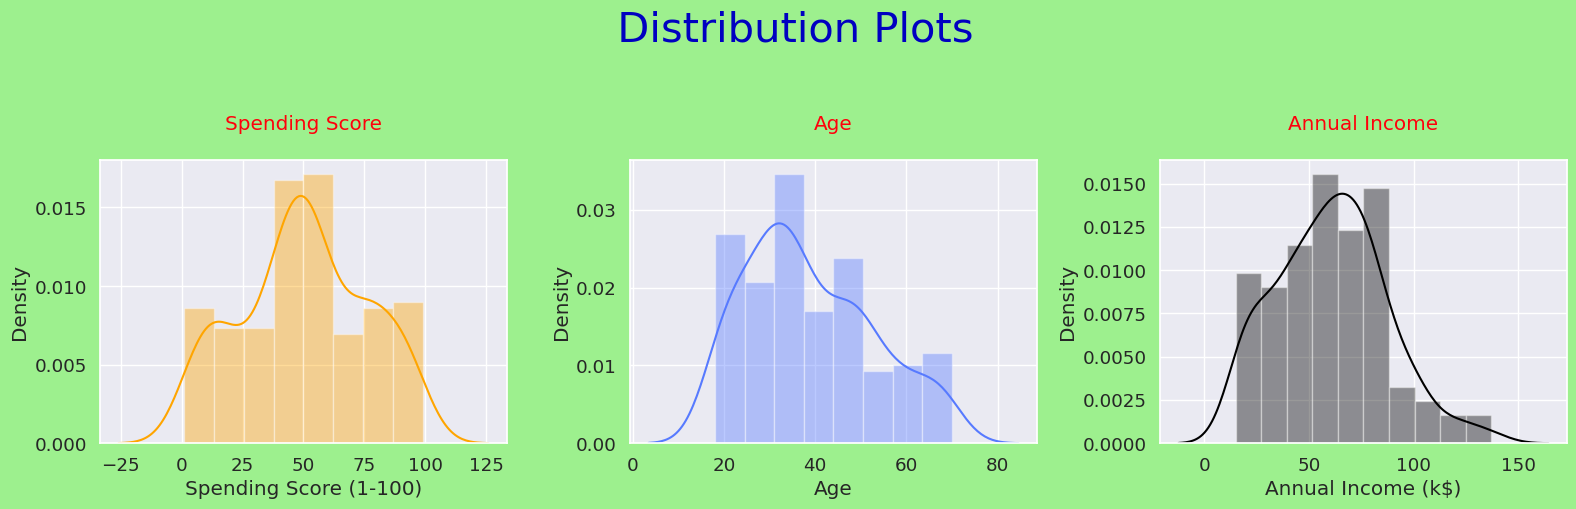

In [10]:
# -Distribution Plots-

plt.figure(figsize=(16,12),facecolor='#9DF08E')

# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color='#FF000B')
sns.distplot(df['Spending Score (1-100)'], color='orange')

# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='#FF000B')
sns.distplot(df['Age'], color='#577AFF')

# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='#FF000B')
sns.distplot(df['Annual Income (k$)'], color='black')

plt.suptitle(' Distribution Plots\n', color='#0000C1', size = 30)
plt.tight_layout()

In [11]:
# Before-After Label Encoder

from sklearn.preprocessing import LabelEncoder

print('\033[0;32m' + 'Before Label Encoder\n' + '\033[0m' + '\033[0;32m', df['Gender'])

le = LabelEncoder()
df['Gender'] = le.fit_transform(df.iloc[:,0])

print('\033[0;31m' + '\n\nAfter Label Encoder\n' + '\033[0m' + '\033[0;31m', df['Gender'])

Before Label Encoder
 0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object


After Label Encoder
 0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64


Male - 1 & Female - 0

In [12]:
# Let's look at the current state of our Data Frame.
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [13]:
# Let's calculate how much to shop for which gender

spending_score_male = 0
spending_score_female = 0

for i in range(len(df)):
    if df['Gender'][i] == 1:
        spending_score_male = spending_score_male + df['Spending Score (1-100)'][i]
    if df['Gender'][i] == 0:
        spending_score_female = spending_score_female + df['Spending Score (1-100)'][i]


print('\033[1m' + '\033[93m' + f'Males Spending Score  : {spending_score_male}')
print('\033[1m' + '\033[93m' + f'Females Spending Score: {spending_score_female}')

Males Spending Score  : 4269
Females Spending Score: 5771


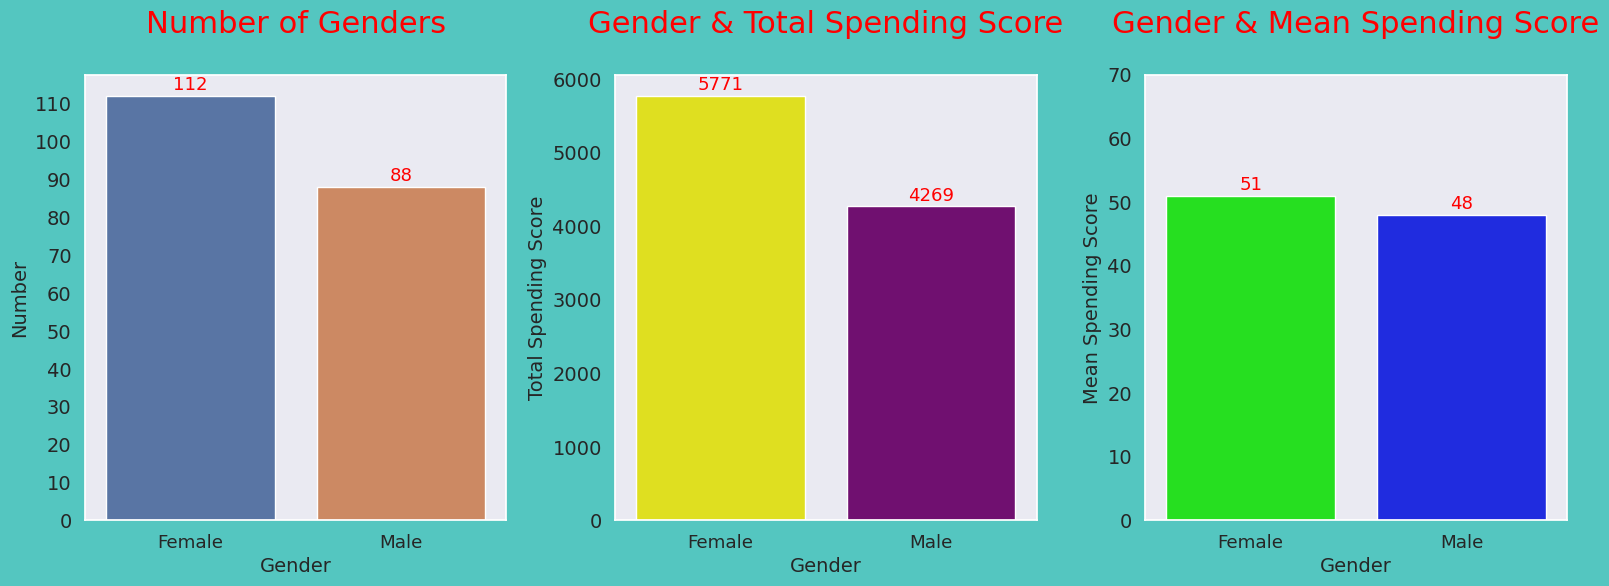

In [14]:
# Let's try to understand the relationship between gender and spending score.
 
# Number of genders
    
plt.figure(figsize=(16,16),facecolor='#54C6C0')
plt.subplot(3,3,1)
plots = sns.barplot(x=['Female','Male'], y=df['Gender'].value_counts(), data=df)  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Number", size=14)
plt.yticks(np.arange(0,116,10),size='14')
plt.grid(False)
plt.title("Number of Genders\n", color="red", size='22')



# Gender & Total Spending Score

list_genders_spending_score = [int(spending_score_female),int(spending_score_male)]
series_genders_spending_score = pd.Series(data = list_genders_spending_score)


plt.subplot(3,3,2)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score, palette=['yellow','purple'])  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Total Spending Score", size=14)
plt.yticks(np.arange(0,6001,1000),size='14')
plt.grid(False)
plt.title("Gender & Total Spending Score\n", color="red", size='22')



# Gender & Mean Spending Score 

list_genders_spending_score_mean = [int(spending_score_female/df['Gender'].value_counts()[0]),int(spending_score_male/df['Gender'].value_counts()[1])]
series_genders_spending_score_mean = pd.Series(data = list_genders_spending_score_mean)

plt.subplot(3,3,3)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score_mean, palette='hsv')  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Mean Spending Score", size=14)
plt.yticks(np.arange(0,71,10),size='14')
plt.grid(False)
plt.title("Gender & Mean Spending Score\n", color="red", size='22')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age - Spending Score')

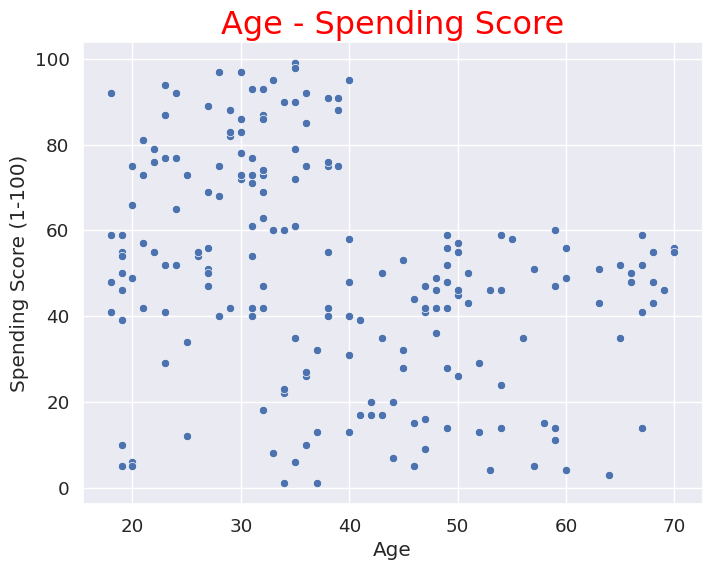

In [15]:
# Let's look at the relationship between Age and Spending score

plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'])
plt.title('Age - Spending Score', size = 23, color='red')

Text(0.5, 1.0, 'Annual Income - Spending Score')

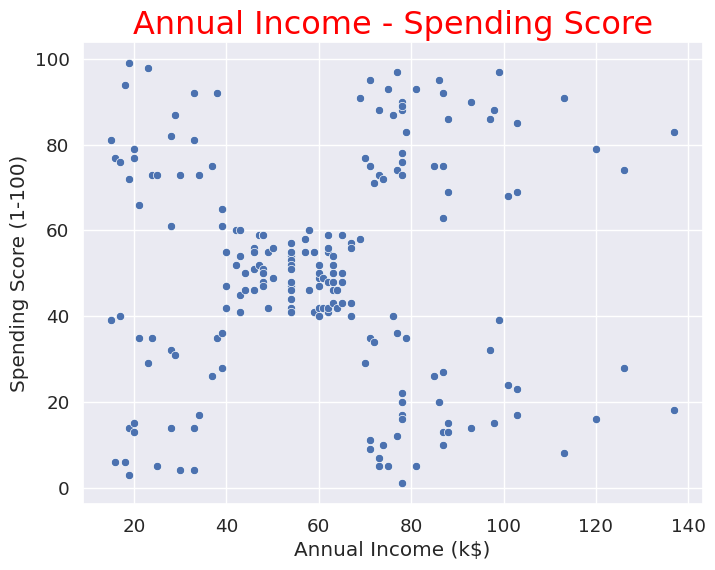

In [16]:
# Let's look at the relationship between Annual Income and Spending Score

plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], palette = "red")
plt.title('Annual Income - Spending Score', size = 23, color='red')

# Clustering

In [17]:
# x assignment
x = df.iloc[:,0:].values 
print("\033[1;31m"  + f'X data before PCA:\n {x[0:5]}')


# standardization before PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)


# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_2D = pca.fit_transform(X)
print("\033[0;32m" + f'\nX data after PCA:\n {X_2D[0:5,:]}')

X data before PCA:
 [[ 1 19 15 39]
 [ 1 21 15 81]
 [ 0 20 16  6]
 [ 0 23 16 77]
 [ 0 31 17 40]]

X data after PCA:
 [[-0.40638272 -0.52071363]
 [-1.42767287 -0.3673102 ]
 [ 0.05076057 -1.89406774]
 [-1.6945131  -1.63190805]
 [-0.31310838 -1.81048272]]


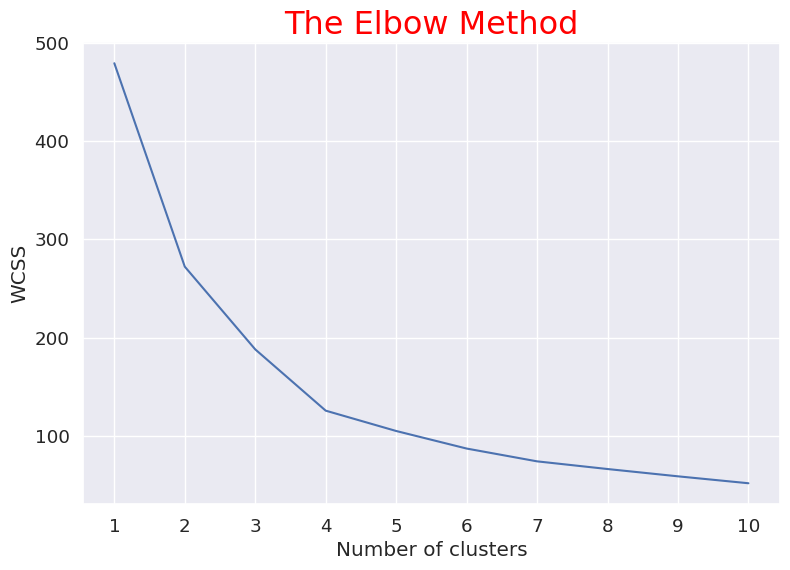

In [18]:
# finding optimum number of clusters
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(X_2D)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [19]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X_2D)

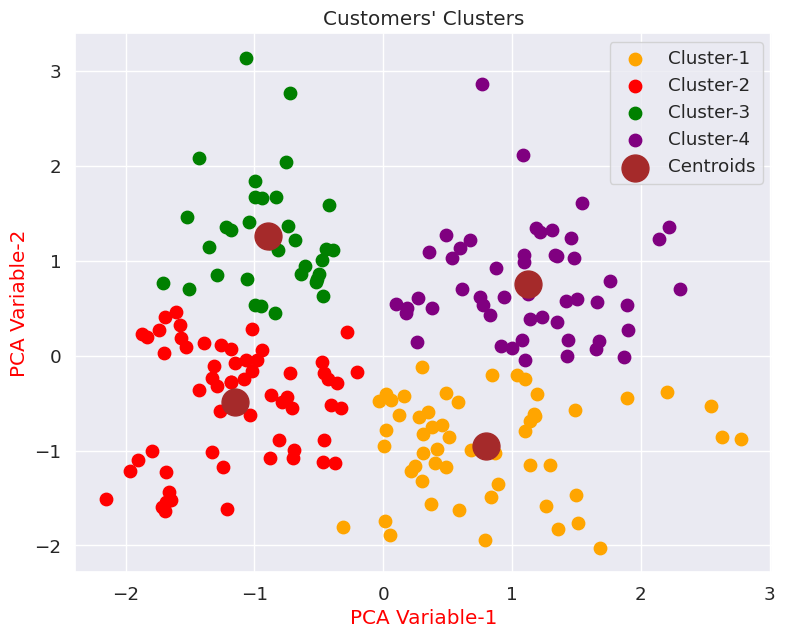

In [20]:
# clusters visualization
plt.figure(1 , figsize = (9 ,7))
plt.scatter(X_2D[y_kmeans == 0, 0], X_2D[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(X_2D[y_kmeans == 1, 0], X_2D[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(X_2D[y_kmeans == 2, 0], X_2D[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster-3')
plt.scatter(X_2D[y_kmeans == 3, 0], X_2D[y_kmeans == 3, 1], s = 80, c = 'purple', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable-1', color='red')
plt.ylabel('PCA Variable-2', color='red')
plt.legend()
plt.show()

**Clustering (Age & Annual Income & Spending Score)**

In [21]:
# x assignment
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values
x_df = df[['Age','Annual Income (k$)','Spending Score (1-100)']] # this line for 3d scatter plot

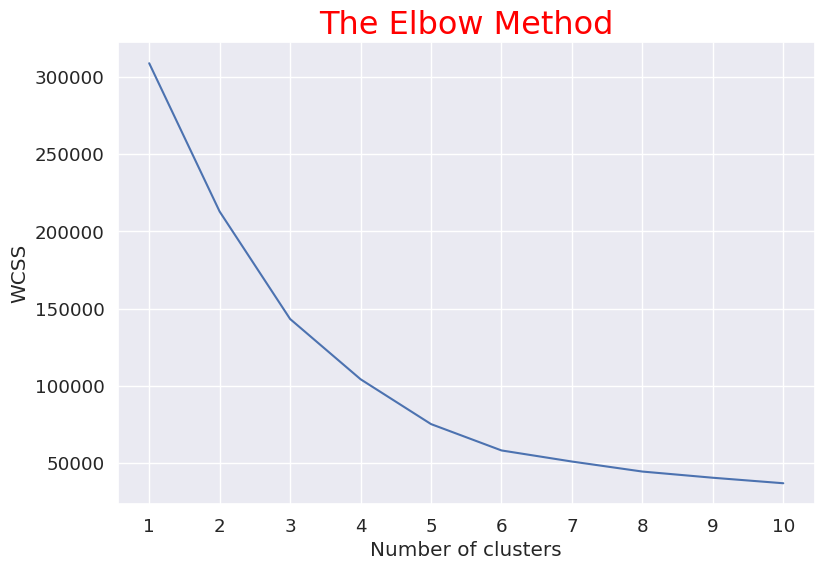

In [22]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [23]:
# KMeans
kmeans = KMeans(n_clusters = 6, init ='k-means++', random_state=88)
clusters = kmeans.fit_predict(x_df)
x_df['label'] = clusters

In [24]:
# # clusters visualization
fig = px.scatter_3d(data_frame=x_df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color = 'label', size = 'label')
fig.show()

**Clustering (Age & Annual Income)**

In [25]:
# x assignment
x = df[['Age','Annual Income (k$)']].values

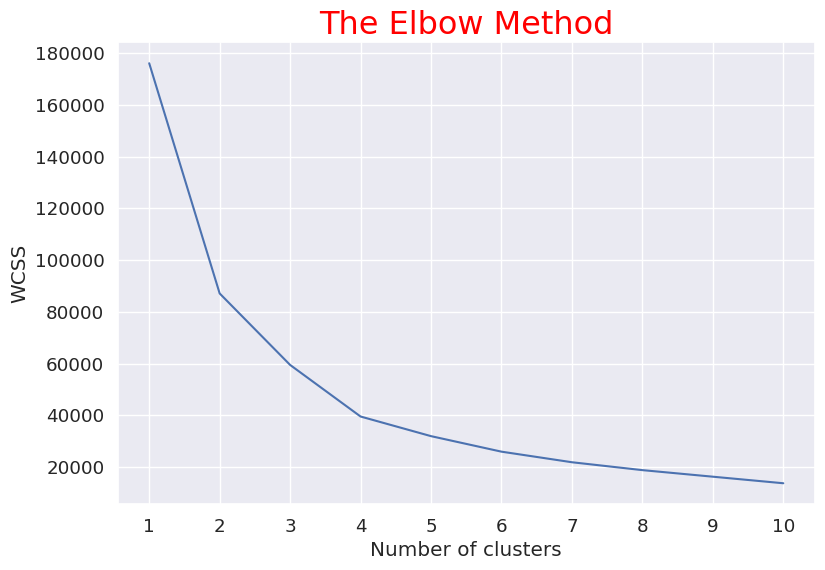

In [26]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [27]:
# KMeans
kmeans = KMeans(n_clusters = 2, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

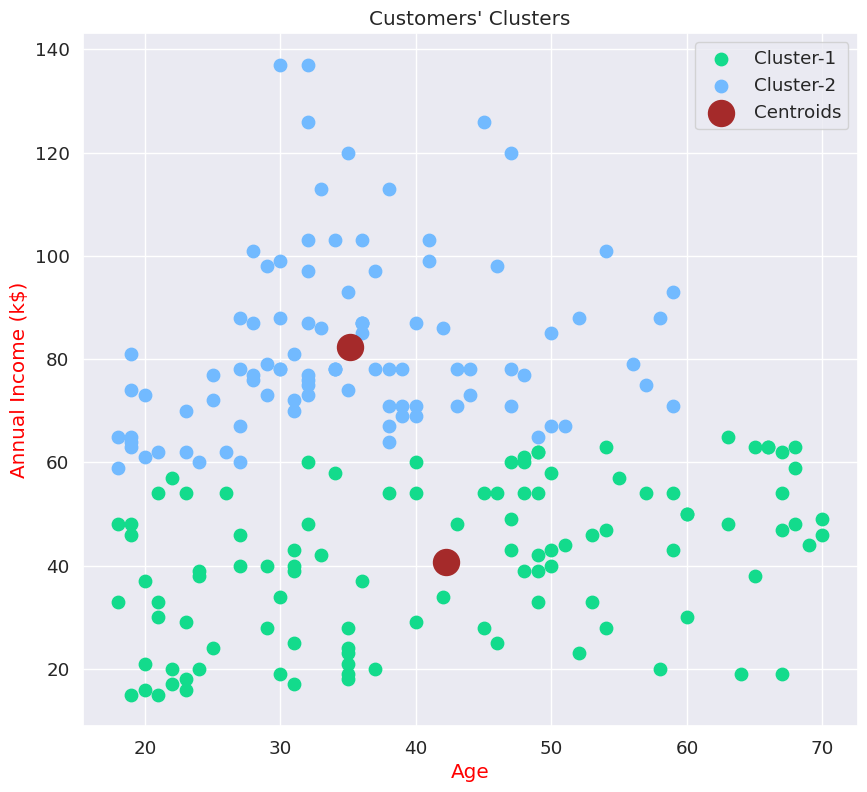

In [28]:
# clusters visualization
plt.figure(1 , figsize = (10 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = '#13DB8C', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = '#72BAFF', label = 'Cluster-2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 350, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Annual Income (k$)', color='red')
plt.legend()
plt.show()

**Clustering (Annual Income & Spending Score)**

In [29]:
# x assignment
x = df[['Annual Income (k$)','Spending Score (1-100)']].values

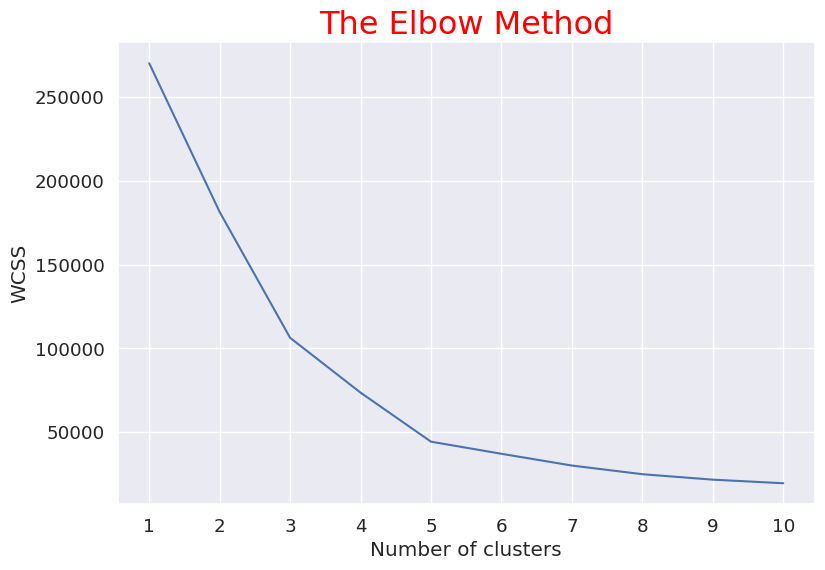

In [30]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

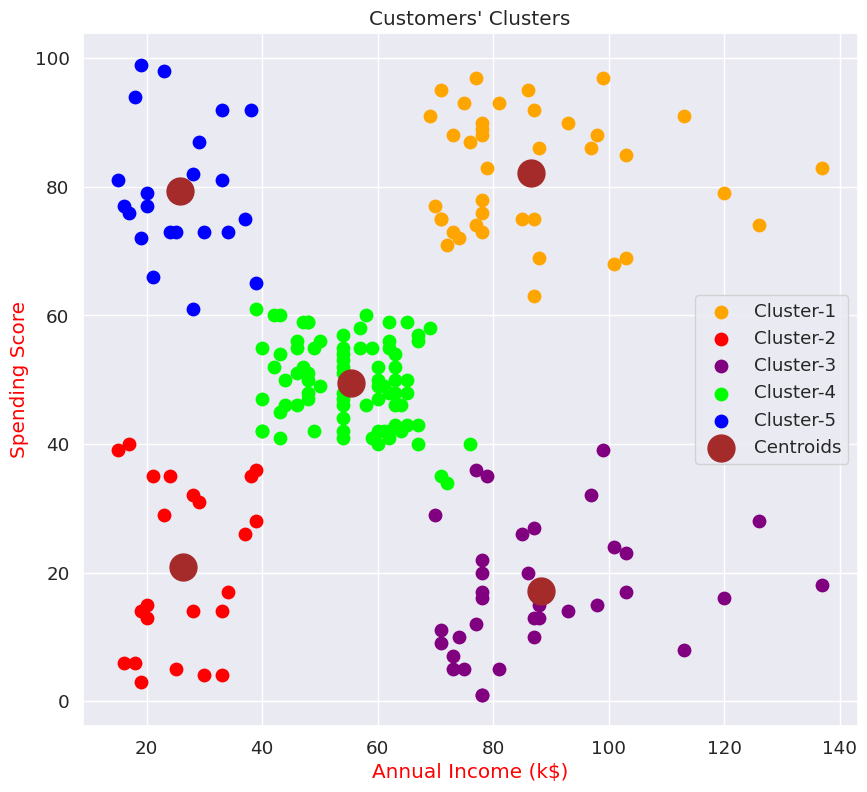

In [32]:
# clusters visualization
plt.figure(1 , figsize = (10 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'purple', label = 'Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = 'lime', label = 'Cluster-4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 80, c = 'blue', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Annual Income (k$)', color='red')
plt.ylabel('Spending Score', color='red')
plt.legend()
plt.show()

**Clustering(Age & Spending Score)**

In [33]:
# x assignment
x = df[['Age','Spending Score (1-100)']].values

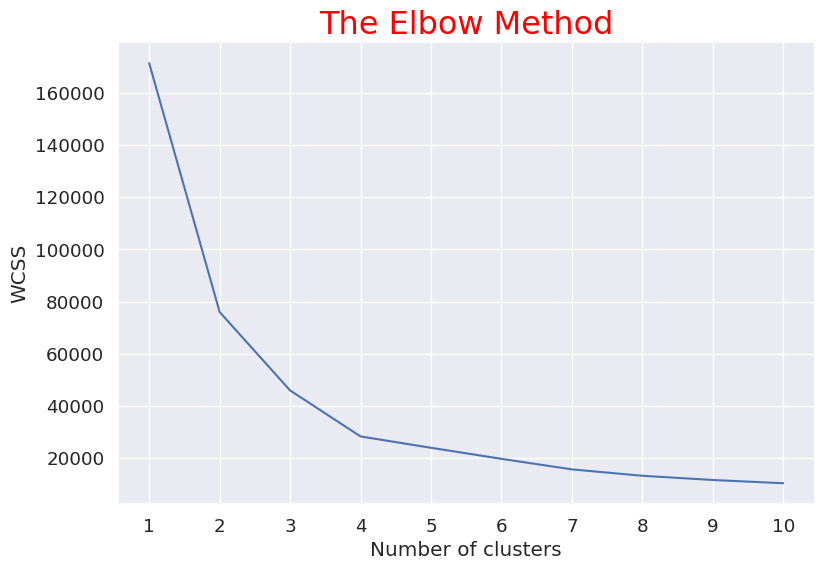

In [34]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [35]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

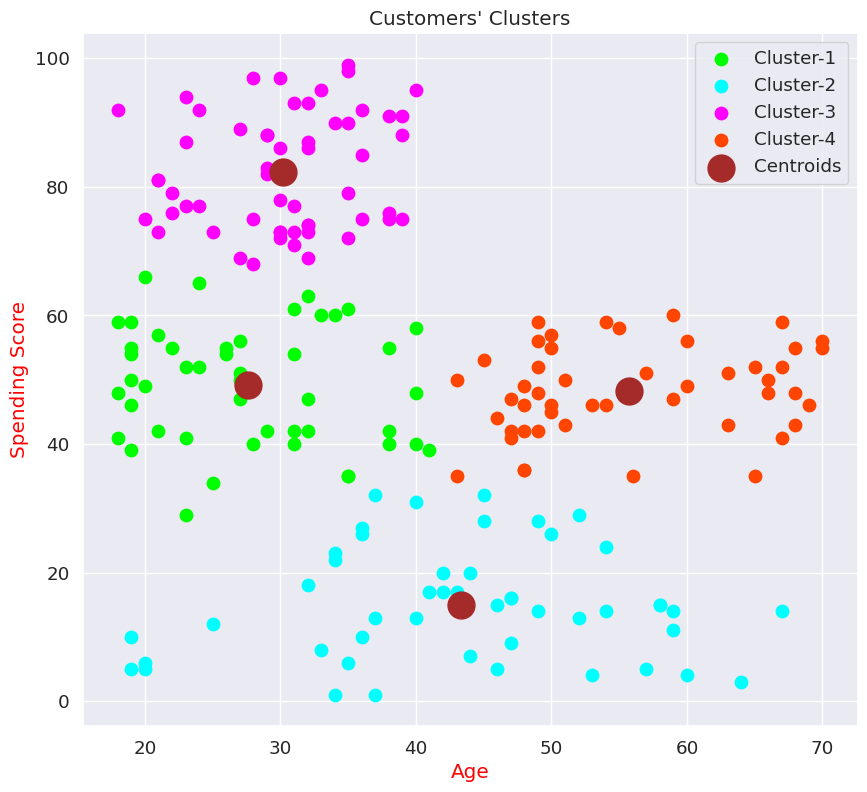

In [36]:
# clusters visualization
plt.figure(1 , figsize = (10 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = '#00FF00', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = '#00FFFF', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = '#FF00FF', label = 'Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = '#FF4500', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Spending Score', color='red')
plt.legend()
plt.show()